Evaluate two model results based on new metrics definition

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300
from sklearn.metrics import r2_score, mean_squared_error
from functions.functions import load_data_forGridSearch, load_object
from matplotlib.ticker import FormatStrFormatter

In [2]:
def evaluate_generic_metrics(labels, predictions):
    
    # label_norm = np.sqrt(np.sum(labels**2, axis=1))
    # prediction_norm = np.sqrt(np.sum(predictions**2, axis=1))
    label_norm = [np.linalg.norm(y) for y in labels]
    prediction_norm = [np.linalg.norm(y) for y in predictions]
    
    # R^2
    r2_c = r2_score(y_true=labels, y_pred=predictions, multioutput='raw_values')
    r2 = r2_score(y_true=labels, y_pred=predictions)
    r2_norm = r2_score(y_true=label_norm, y_pred=prediction_norm)

    # Root mean squared error
    rmse_c = np.sqrt(mean_squared_error(y_true=labels, y_pred=predictions, multioutput='raw_values'))
    rmse = np.sqrt(mean_squared_error(y_true=labels, y_pred=predictions))
    rmse_norm = np.sqrt(mean_squared_error(y_true=label_norm, y_pred=prediction_norm))

    return {"R2_x": r2_c[0],
            "R2_y": r2_c[1],
            "R2_z": r2_c[2], 
            "R2": r2,
            "R2_norm": r2_norm,
            "RMSE_x_mT": rmse_c[0]*1000,
            "RMSE_y_mT": rmse_c[1]*1000,
            "RMSE_z_mT": rmse_c[2]*1000,
            "RMSE_mT": rmse*1000,
            "RMSE_norm_mT": rmse_norm*1000}

In [9]:
mlp_results_folder = "../Models/Small_training_set/ANN"
rf_results_folder = "../Models/Small_training_set/RF"

In [7]:
# load testing data
X_test, y_test = load_data_forGridSearch("../Data", "test")

In [10]:
# load predictions

run = 6

p_list = np.arange(0.1, 1.0, 0.1)
p_list = p_list.round(decimals=1)

ANN_R2_norm_results = []
ANN_RMSE_norm_results = []

RF_R2_norm_results = []
RF_RMSE_norm_results = []


for p in p_list:
    ann_predictions = np.load(os.path.join(mlp_results_folder, "predictions_ANN{}_{}.npy".format(run, p)))
    mlp_results = evaluate_generic_metrics(y_test, ann_predictions)
    ANN_R2_norm_results.append(mlp_results["R2_norm"])
    ANN_RMSE_norm_results.append(mlp_results["RMSE_norm_mT"])
    
    rf_predictions = np.load(os.path.join(rf_results_folder, "predictions_RF{}_{}.npy".format(run, p)))
    rf_results = evaluate_generic_metrics(y_test, rf_predictions)
    RF_R2_norm_results.append(rf_results["R2_norm"])
    RF_RMSE_norm_results.append(rf_results["RMSE_norm_mT"])
    
    

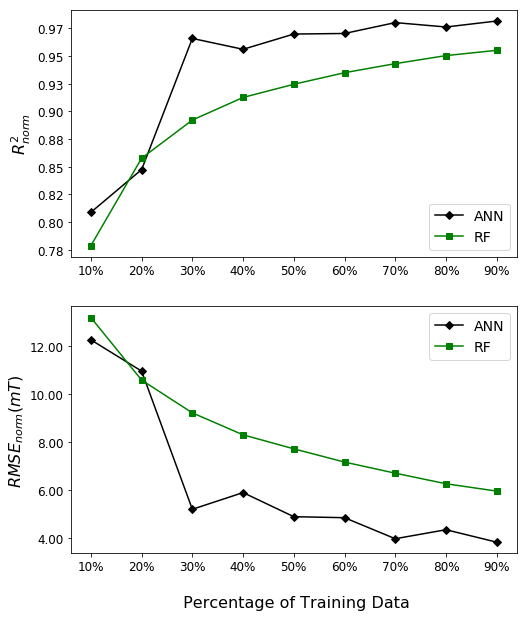

In [12]:
# used this one in paper, just to keep consistent

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

x_ticks_list = ['new', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
axs[0].plot(p_list, ANN_R2_norm_results, linestyle = "-", marker='D', color = 'k', label = "ANN")
axs[0].plot(p_list, RF_R2_norm_results, linestyle = "-", marker='s', label = "RF", color='g')
axs[0].set_ylabel(r"$R_{norm}^2$", size=16)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[0].legend(loc="lower right", prop={'size': 14})
axs[0].set_xticklabels(x_ticks_list)
# axes.set_xticklabels(labels, fontdict=None, minor=False)
axs[0].tick_params(axis="x", labelsize=12)
axs[0].tick_params(axis="y", labelsize=12)

axs[1].plot(p_list, ANN_RMSE_norm_results, linestyle = "-", marker='D', color = 'k', label = "ANN")
axs[1].plot(p_list, RF_RMSE_norm_results, linestyle = "-", marker='s', label = "RF", color='g')
axs[1].set_ylabel(r"$RMSE_{norm} (mT)$", size=16)
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].legend(loc="upper right", prop={'size': 14})
axs[1].set_xticklabels(x_ticks_list)
axs[1].tick_params(axis="x", labelsize=12)
axs[1].tick_params(axis="y", labelsize=12)

axs[1].set_xlabel("\n Percentage of Training Data", size=16)

plt.show()
# save figure
# fig.savefig("../Figures/less_training_single_trial.png", dpi=300)  # used in the paper